In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import scipy.io
import time
from torch.utils.data import TensorDataset, DataLoader, Dataset
from matplotlib import pyplot as plt
import scipy as sp



In [2]:
#########################################################
### input parameter for training ###
N_of_data=  # training set. number
N_of_vdata=  # validation set, number
N_of_tdata=  # test set, number

batch_size=  # batch_size
N_epoch=     # epoch
num_filter =
data_size=1 # data_size (ex 144x144x144 volume -> 144)
###

params2 = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 0}

#########################################################

In [3]:
class CustomNumpyDataset(Dataset):
    def __init__(self, numpy_DataArray, numpy_GTArray, transform=None):
        self.numpy_DataArray = numpy_DataArray
        self.numpy_GTArray = numpy_GTArray
        self.transform = transform

    def __len__(self):
        return self.numpy_DataArray.shape[2]

    def __getitem__(self, idx):
        input_data = self.numpy_DataArray[:,:,idx]
        input_data = input_data.reshape((1,self.numpy_DataArray.shape[0],self.numpy_DataArray.shape[1]))
        input_data = torch.from_numpy(input_data)

        target_data = self.numpy_GTArray[:,:,idx]
        target_data = target_data.reshape((1,self.numpy_GTArray.shape[0],self.numpy_GTArray.shape[1]))
        target_data = torch.from_numpy(target_data)        
        
        if self.transform:
            input_data, target_data = self.transform(input_data, target_data)
        
        return input_data, target_data

In [4]:
### checking that cuda is available or not ###
USE_CUDA=torch.cuda.is_available()
DEVICE=torch.device("cuda" if USE_CUDA else "cpu")
print("CUDA: {}".format(USE_CUDA))
###


CUDA: False


In [5]:
# Load Simulated Data from Part1

TrainingDataImageArray = np.load("TrainingData.npy")
TrainingGTImageArray = np.load("TrainingGT.npy")

ValidationDataImageArray = np.load("ValidationData.npy")
ValidationGTImageArray = np.load("ValidationGT.npy")

TestDataImageArray = np.load("TestData.npy")
TestGTImageArray = np.load("TestGT.npy")

In [6]:
# Build Pytorch Dataset

train_dataset = CustomNumpyDataset(TrainingDataImageArray, TrainingGTImageArray, DLa.image_shift(4))
validation_dataset = CustomNumpyDataset(ValidationDataImageArray, ValidationGTImageArray, DLa.image_shift(4))
test_dataset = CustomNumpyDataset(TestDataImageArray, TestGTImageArray, DLa.image_shift(4))

In [7]:
# Build Pytorch Data Loader

train_generator = DataLoader(train_dataset, **params2)
validation_generator = DataLoader(validation_dataset, **params2)
test_generator = DataLoader(test_dataset, **params2)

In [8]:
### generate neural network model model 
# example: aut = DLa.UnetGenerator_2d(in_dim=1,out_dim=1,num_filter=num_filter).to(DEVICE)
print("model contructing: OK!")
###

model contructing: OK!


In [9]:
N_epoch=10;     # epoch


### define loss function & optimizer ###
criterion = nn.MSELoss()
optimizer = optim.Adam(aut.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
#optimizer = optim.SGD(aut.parameters(), lr=0.05, momentum=0.9)
###

 
### training process ###
###


### calculate loss of test set ####

###



### save the result ###
PATH = './DL_aug_save_file/2DTomoTrainingResult'
torch.save(aut.state_dict(), PATH)
print('saving model: OK!')
###


Training starts
[i: 10,   10 %] loss: 0.2649580335
[i: 20,   20 %] loss: 0.4335584838
[i: 30,   30 %] loss: 0.5826759829
[i: 40,   40 %] loss: 0.7204094177
[i: 50,   50 %] loss: 0.8532487915
[i: 60,   60 %] loss: 0.9813717270
[i: 70,   70 %] loss: 1.1038435652
[i: 80,   80 %] loss: 1.2238467435
[i: 90,   89 %] loss: 1.3402788048
[i: 100,  100 %] loss: 1.4554288401
[epoch: 1,  10 %] training set loss: 0.0874143194 
[epoch: 1,  10 %] validation set loss: 0.0872806378 time: 6.970 
[i: 10,   10 %] loss: 0.1086056476
[i: 20,   20 %] loss: 0.2174322497
[i: 30,   30 %] loss: 0.3325086768


KeyboardInterrupt: 

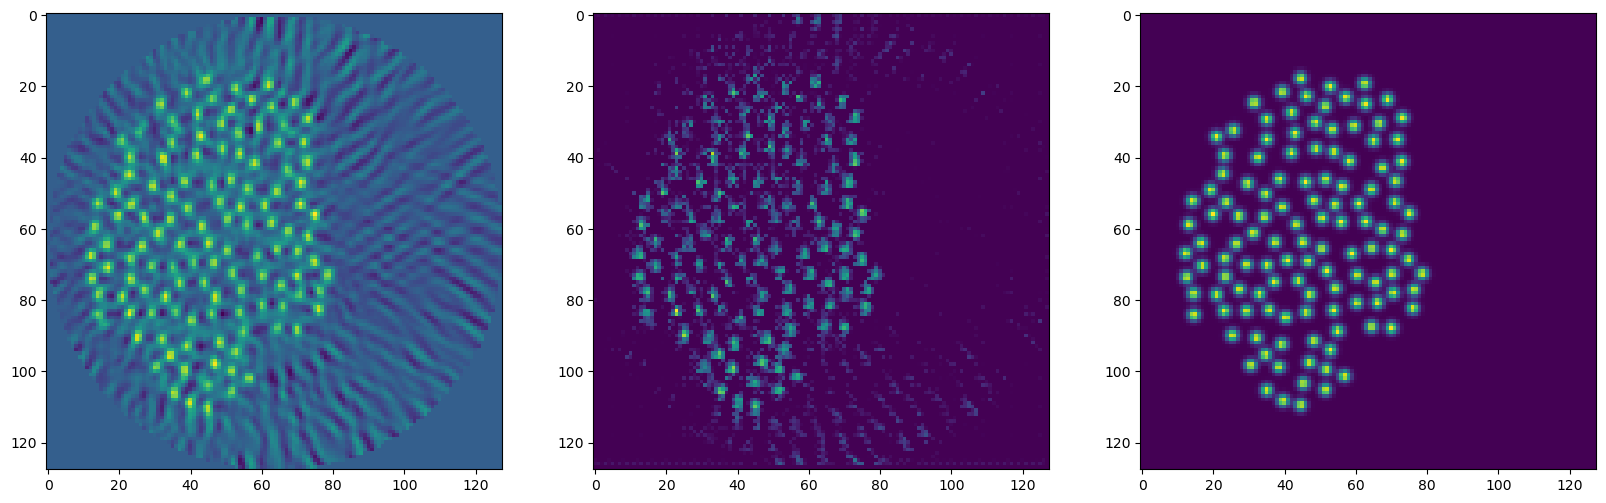

In [10]:
# Check the inference of trained network

i = 805

input_data = TrainingDataImageArray[:,:,i]
GT_data = TrainingGTImageArray[:,:,i]

with torch.no_grad():
    inputs = torch.tensor(input_data.reshape(1,input_data.shape[0],input_data.shape[1])).view(-1,1,data_size,data_size).float().to(DEVICE)
    
    outputs1 = aut(inputs)
    outputs = outputs1.data[0][0].cpu().numpy()

f = plt.figure(figsize=(20,6))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.imshow(input_data)
ax2.imshow(outputs)
ax3.imshow(GT_data)

In [11]:
### generate DL-augmenation model(Unet) for inference for test dataset ###
# aut_inf = DLa.UnetGenerator_2d(in_dim=1,out_dim=1,num_filter=num_filter).to(DEVICE)
print("model contructing: OK!")
###


### loading a previous saved model parameter ###
PATH = './DL_aug_save_file/2DTomoTrainingResult' 
aut_inf.load_state_dict(torch.load(PATH, map_location={'cuda:0': 'cpu'}))
#aut_inf.load_state_dict(torch.load(PATH))
aut_inf.to(DEVICE)

print("loading save file: OK!")
###

aut_inf.eval()

# Array to store DL-Augmented image
DLAugArr = np.zeros(TestDataImageArray.shape)

### run model through the test dataset

model contructing: OK!
loading save file: OK!


C:\Users\ysyang\AppData\Local\Temp\ipykernel_21996\245150221.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  aut_inf.load_state_dict(torch.load(PATH, map_location={'cuda

In [14]:
def obtain_RMSD(Img, GTPos, cropHalfDim=2, intThresh = 0.2):

    # Img: 2D numpy array for the grascale image for local 2D Gaussin fitting (atom tracing)
    # cropHalfDim: Half width for cropping for local Gaussing fitting. If cropHalfDim = 2,  local 5x5 arry will be cropped.
    # GTPos: 2D numpy array (N x 2) containing ground trugh atom positions

    # number of atoms in ground truth
    
    # obtain local maxima
    

    # sort in descending order

    # parameters for Gaussian fitting
    
    # f = plt.figure(figsize=(20,6))
    # ax = f.add_subplot(121)
    # ax2 = f.add_subplot(122)

    # array for storing fitted local position

    # run 2D Gaussin Fitting     
    for i in range(len(SortInd_crop)):  

        # sp.optimize.curve_fit  can be useful        


    # obtain full fitted position by adding the local Gaussian fitted shift
    
    # Build Cost matrix for scipy.optimize.linear_sum_assignment (Munkres algorithm)
    
    # complex number trick for quick 2D distance calculation
    
    # 2D distance matrix
    # Cost = abs(m[..., np.newaxis] - z)
    
    # Solve the linear sum assignment problem for atom matching (Hungarian algorithm)
    # sp.optimize.linear_sum_assignment can be useful

    # calculate RMSD
    return RMSD

        

In [15]:
TestAtomPos = np.load('TestAtomPos.npy', allow_pickle=True)

i = 6;

print(obtain_RMSD(TestDataImageArray[:,:,i], TestAtomPos[i], intThresh = 0.4))
print(obtain_RMSD(DLAugArr[:,:,i], TestAtomPos[i], intThresh = 0.4))
print(obtain_RMSD(TestGTImageArray[:,:,i], TestAtomPos[i], intThresh = 0.4))






0.05524110440857687
0.024257384316936945


C:\Users\ysyang\AppData\Local\Temp\ipykernel_21996\2649176549.py:42: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = sp.optimize.curve_fit(DLa.calc_2D_guass, cropFullDim, currCropArea.reshape(-1), p0 = initial_guess)


0.000619360563743123
